# Web Crawlers

### What are Web Crawlers ?

#### DEFINITION:
A web crawler, crawler or web spider, is a computer program that's used to search and automatically index website content and other information over the internet.
#### ALTERNATIVE:
Crawlers are software or scripts programmed to systematically browse the World Wide Web as part of an automated process.



### Crawling process
<img src="img/crawler_process.png" width="650">


* Step 1: Crawler will start processing a list of web pages (predefined). 
* Step 2: Once web crawlers start crawling a page, they discover new pages via hyperlinks. 
* Step 3: Crawlers add newly discovered URLs to the crawl queue so that they can be crawled later

**Result**: Thanks to this flow, web crawlers can explore every single page that is connected to others!


### What types of Web Crawlers are there ?
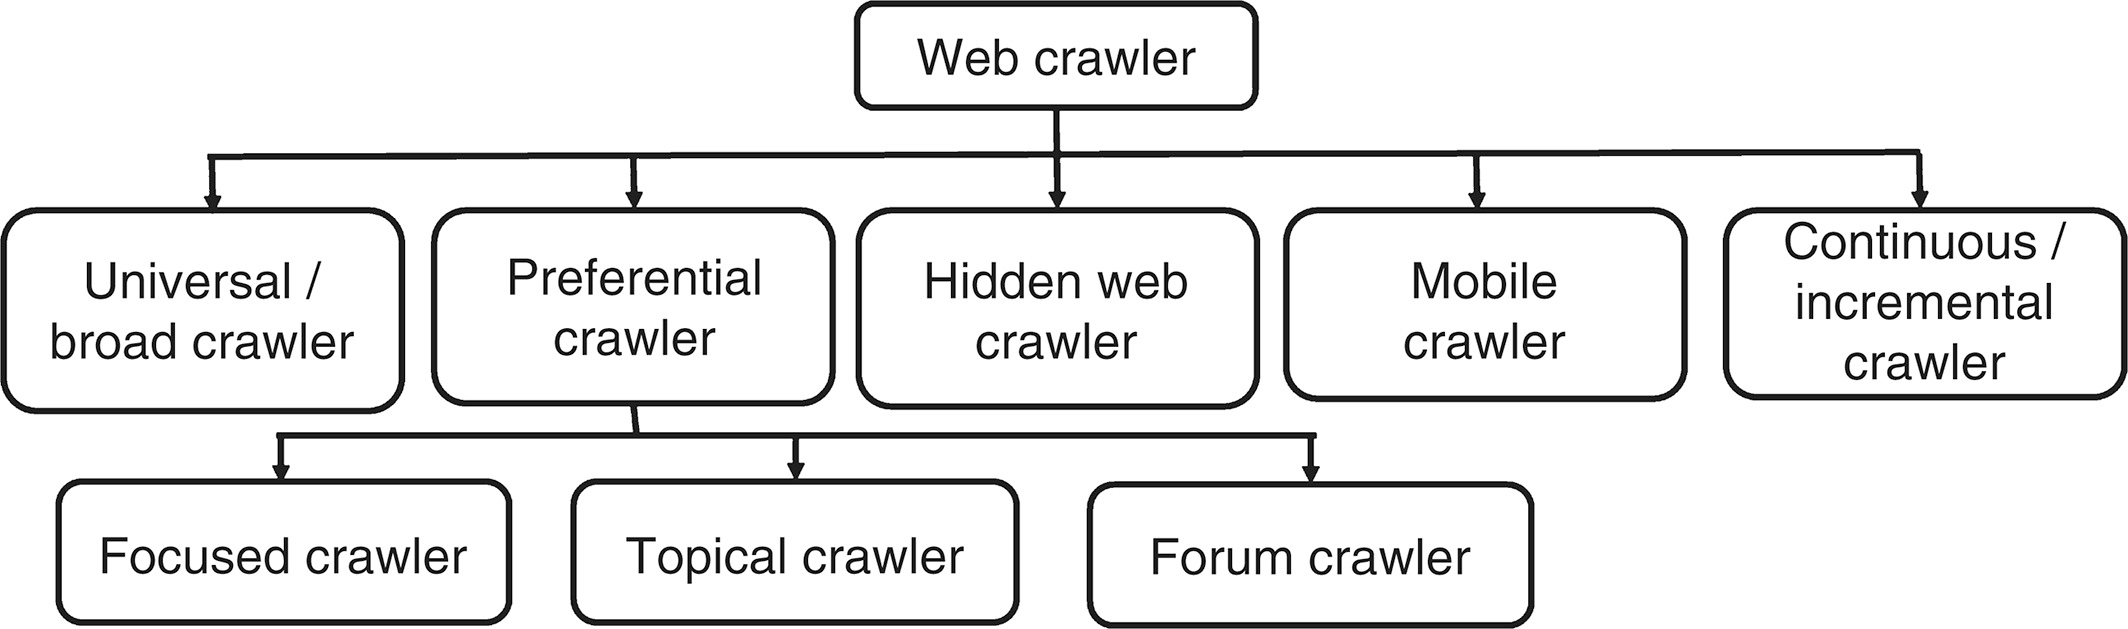

<em>Kumar, Manish & Bhatia, Rajesh & Rattan, Dhavleesh. (2017). A survey of Web crawlers for information retrieval. Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery. 7. 10.1002/widm.1218. </em>

### Question: 
Client is in the business of extracting large amount of sports data. They have a framework that executes “crawlers”. You get to look at the architecture of how data is extracted and conclude that a separate “crawler” is implemented for every web page of interest. How does this align with the definition of a crawler ?

**Answer:** Web scraping is about extracting specific data from one or more websites. While crawling is about extracting the whole page and additional URLs or links on the web. 

<img src="img/scrapevscrawl.png" width="650">

### Question: 
Does a web crawler exclude the usage of web scraper ? How do crawlers and scrapers scale?


**Answer:** Crawler can be used to detect pages and then scrapers to extract specific information rather than the whole page content. This is used when the target domain is clear.
Crawlers are always used on large scale, while scrapers can be used on small and large scales.


### What are they used for ?
* Search engines
    * Googlebot
    * Bingbot
    * Applebot(Siri)
    * Xenon (Tax authorities)
    * ChatGPT
* Web Scraping
    * Data Analytics & Data Science
    * Marketing & Sales
    * Competition Research
    * Academic Research (especially with Machine learning advances in recent years)
* Data analytics

## Crawling with Scrapy
#### https://scrapy.org/

In [1]:
# Settings for notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Show Python version
import platform
platform.python_version()

try:
    import scrapy
except:
    !pip install scrapy
    import scrapy
from scrapy.crawler import CrawlerProcess

In [3]:
import json

class JsonWriterPipeline(object):

    def open_spider(self, spider):
        self.file = open('quoteresult.jl', 'w')

    def close_spider(self, spider):
        self.file.close()

    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item

## Create the Spider

In [4]:
import logging

class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'http://quotes.toscrape.com/page/1/',
        'http://quotes.toscrape.com/page/2/'
    ]
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1}, # Used for pipeline 1
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'quoteresult.json'                        # Used for pipeline 2
    }
    
    def parse(self, response):
        for quote in response.css('div.quote'):
            print(quote)
            yield {
                'text': quote.css('span.text::text').extract_first(),
                'author': quote.css('span small::text').extract_first(),
                'tags': quote.css('div.tags a.tag::text').extract(),
            }

In [5]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(QuotesSpider)
process.start()

2023-12-04 18:50:39 [scrapy.utils.log] INFO: Scrapy 2.7.1 started (bot: scrapybot)
2023-12-04 18:50:39 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.12, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.9.11 (tags/v3.9.11:2de452f, Mar 16 2022, 14:33:45) [MSC v.1929 64 bit (AMD64)], pyOpenSSL 22.1.0 (OpenSSL 3.0.7 1 Nov 2022), cryptography 38.0.4, Platform Windows-10-10.0.22621-SP0
2023-12-04 18:50:39 [scrapy.crawler] INFO: Overridden settings:
{'LOG_LEVEL': 30,
 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2023-12-04 18:50:39 [py.warnings] WARNING: C:\Users\didimitrov\AppData\Local\Programs\Python\Python39\lib\site-packages\scrapy\utils\request.py:231: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. Thi

<Selector xpath="descendant-or-self::div[@class and contains(concat(' ', normalize-space(@class), ' '), ' quote ')]" data='<div class="quote" itemscope itemtype...'>
<Selector xpath="descendant-or-self::div[@class and contains(concat(' ', normalize-space(@class), ' '), ' quote ')]" data='<div class="quote" itemscope itemtype...'>
<Selector xpath="descendant-or-self::div[@class and contains(concat(' ', normalize-space(@class), ' '), ' quote ')]" data='<div class="quote" itemscope itemtype...'>
<Selector xpath="descendant-or-self::div[@class and contains(concat(' ', normalize-space(@class), ' '), ' quote ')]" data='<div class="quote" itemscope itemtype...'>
<Selector xpath="descendant-or-self::div[@class and contains(concat(' ', normalize-space(@class), ' '), ' quote ')]" data='<div class="quote" itemscope itemtype...'>
<Selector xpath="descendant-or-self::div[@class and contains(concat(' ', normalize-space(@class), ' '), ' quote ')]" data='<div class="quote" itemscope itemtype...'>
<Sel

In [6]:
!dir quoteresult.*

 Volume in drive C is Windows
 Volume Serial Number is F6E8-F02F

 Directory of C:\Users\didimitrov\U_N_I\IR_REPO\information_retrieval_fmi

12/04/2023  06:50 PM             5,571 quoteresult.jl
12/04/2023  06:50 PM            22,292 quoteresult.json
               2 File(s)         27,863 bytes
               0 Dir(s)  51,009,163,264 bytes free


In [2]:
import pandas as pd
dfjson = pd.read_json('quoteresult.json',lines=True)
dfjson

ValueError: Expected object or value

In [3]:
import json
with open('quoteresult.jl','r') as f:
    json.loads(f.read())
#dfjl = pd.read_json('quoteresult.jl', lines=True)
#dfjl

JSONDecodeError: Extra data: line 1 column 225 (char 224)

## Single web page using BeautifulSoup (Python)

In [39]:
from bs4 import BeautifulSoup
import requests
import urllib.request


url = "https://www.facebook.com/groups/769863913384604/feed"
community_page = urllib.request.urlopen(url)
#community_page.read()

document = BeautifulSoup(community_page, "html.parser")
description = document.find_all("meta", property="og:description",content=True)
description

[<meta content="Sila ambil perhatian. Dalam Group ini hanya jualan, iklan, resepi yang berkenaan makanan dan minuman termasuk barang masakan berkaitan dapur sahaja dibenarkan. Harap maklum [ Pembelian / Jualan /..." property="og:description"/>]

In [34]:
def getPropertyFromPage(url):
    """
    Visit the page and choose some properties to crawl from the parser
    """
    pass

In [35]:
getPropertyFromPage("http://quotes.toscrape.com/page/1/")


## Problem for all of the approaches above -> Infinite scrolls (Dynamic content)



- Solution 1: (Naive & Semi-automatic) Go to the page, scroll down as much as necessary and then hit Ctrl + S (save html page on local machine)
    - Pros:
        - Easy to implement
        - Surprisingly helps with hard to crawl websites (Facebook)
    - Cons:
        - A lot of manual work
        - Not scalable
- Solution 2: Fully automatic (Using automation tools)
    - Pros:
        - Overcome dynamic content
        - Build complex logic
        - Scaling
    - Cons:
        - Requires deeper understanding
        - Much slower in most cases
<img src="img/dynamic_page.png" width="650">

**Extra option**: Execute the page's internal JavaScript while scraping. However, not all dynamic pages are the same. Some render content through JS APIs that can be accessed by inspecting the "Network" tab. Others store the JS-rendered content as JSON.


### How to crawl without getting blocked
* Use a proxy – rotate IP addresses (Proxy rotation)
* Reduce the number of crawls for specific web pages

* Change crawling pattern – introduce random clicks, scrolls, and mouse movements, and randomize exact execution time without a range.
* Be careful with honeypot traps – links in HTML code that are only visible to bots, not organic users. Very rare nowadays because the effort required does not outweigh the result. There are workarounds for such traps.
* Commercial solution: get your IPs whitelisted by different web pages (usually there is a contract with the permitted number of crawls per day/week/month)
* Research lab solution: buy 1mil IPs to use as proxies when crawling fake news data.


## Good practices when building large scale web crawlers

- Ensure you have full access to server
- Identify slow websites (e.g. TTFB- Time-to-first-byte metric)
- Crawl during low traffic hours (Off-peak)
- Use Fast and Stable internet connection, preferably Ethernet as Wi-Fi is slower and less reliable
- If possible, run crawlers on a server (cloud compute) instead of desktop. This applies for BIG scale crawling
- Partial crawls: crawl a single website using multiple continous crawlers each focusing on different sections. That way things are simple and everything updated faster with up-to-date data.
- Ignore URL parameters and other URLs that are duplicates of a canonical URL.

### Resources:
- https://www.zenrows.com/blog/dynamic-web-pages-scraping-python#alternatives
- https://www.zenrows.com/blog/bypass-bot-detection
- https://iqss.github.io/dss-webscrape/web-scraping-approaches.html
- https://web.stanford.edu/class/cs276/19handouts/lecture18-crawling-6per.pdf - Very good!!!
- https://sharepoint.stackexchange.com/questions/84913/difference-between-continious-crawl-and-incremental-scheduled-crawl
- https://iqss.github.io/dss-webscrape/web-scraping-approaches.html

### Standford course on Information retrieval - https://web.stanford.edu/class/cs276/

- https://nlp.stanford.edu/IR-book/html/htmledition/irbook.html